Self Project


---


Vinayak Gautam

---



---




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math
%matplotlib inline

In [5]:
df=pd.read_csv("restaurent.csv")
df.head()

,food,decor,service,price
0,18.0,22.0,17.0,41.0
1,24.0,22.0,22.0,54.0
2,18.0,17.0,14.0,32.0
3,18.0,9.0,13.0,20.0
4,21.0,12.0,16.0,25.0


In [6]:
#choosing 50 data samples randomly and reseting index
df1=df.sample(50)
df1.reset_index(inplace = True, drop = True)
df1.head()

,food,decor,service,price
0,23.0,15.0,21.0,36.0
1,20.0,13.0,14.0,23.0
2,21.0,19.0,20.0,42.0
3,22.0,20.0,21.0,42.0
4,21.0,21.0,19.0,33.0


In [7]:
#shape of df1
df1.shape

(50, 4)

In [8]:
#To check if there is a null value
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   food     50 non-null     float64
 1   decor    50 non-null     float64
 2   service  50 non-null     float64
 3   price    50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [9]:
df1.describe()

,food,decor,service,price
count,50.000000,50.000000,50.000000,50.000000
mean,20.400000,17.620000,18.640000,37.460000
std,2.213133,3.875038,2.693605,11.462824
min,16.000000,8.000000,14.000000,18.000000
25%,19.000000,15.000000,16.000000,29.000000
50%,21.000000,17.000000,19.000000,36.000000
75%,22.000000,20.000000,21.000000,44.000000
max,26.000000,28.000000,26.000000,65.000000


**(a)Plot price vs. each of the three independent variables. Does it seem like
y (price) is related to the x’s (food, service, and decor)?**

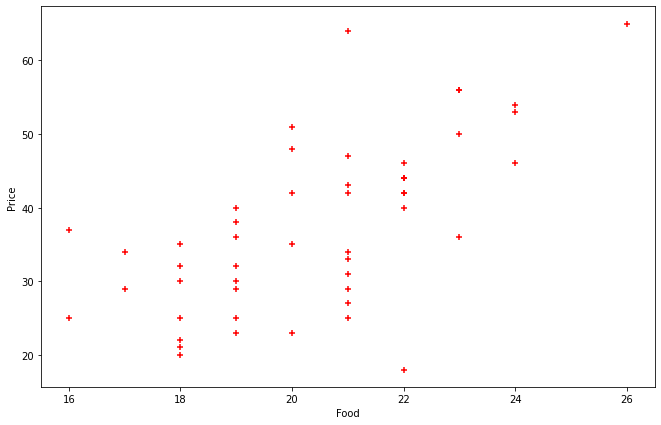

In [10]:
#plotting price vs food
plt.figure(figsize=(11,7))
plt.scatter(df1[['food']],df1[['price']], color='red',marker='+')
plt.ylabel('Price')
plt.xlabel('Food')
plt.show()

Here it seems like price is clearly related to food , as quantity of food increases the price also increases, we can use linear function for preditions, and accuracy would be nearly moderate not much high, if we use only food feature.

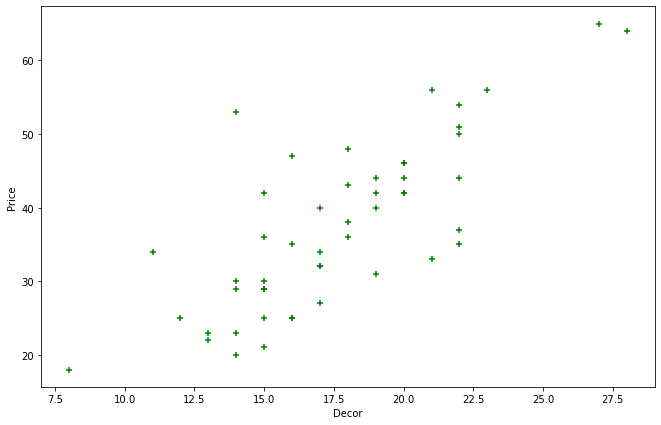

In [11]:
#plotting price vs decor
plt.figure(figsize=(11,7))
plt.scatter(df1[['decor']],df1[['price']], color='green',marker='+')
plt.ylabel('Price')
plt.xlabel('Decor')
plt.show()

Here initially when the decor is less(<7) price doesnot seems to be related to decor as we have very few data points in that region from the randomly selected 50 points, but after that there seems to be price increase with the increase in decor showing a relation betwwen them.

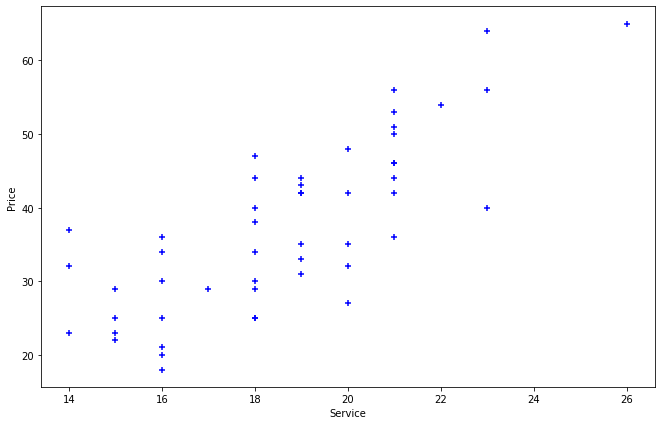

In [12]:
#plotting price vs service
plt.figure(figsize=(11,7))
plt.scatter(df1[['service']],df1[['price']], color='blue',marker='+')
plt.ylabel('Price')
plt.xlabel('Service')
plt.show()

There seems to be a clear relation between price and service as price increases with increase in service feature and linear model can be used with moderate accuracy if only service feature is used.

**(b) Suppose a restaurant has food = 125, service=148, and decor=265. Run
the regression of price on food, decor, and service and give the 95%
predictive interval for the price of a meal.**


In [13]:
#using multiregression
reg=linear_model.LinearRegression()
reg.fit(df1[['food','decor','service']],df1.price)

LinearRegression()

In [14]:
#predicting the price value for given features
a=reg.predict([[125,148,265]])
a

array([623.48341739])

So, Price for the given values of food(125), decor(148), service(265) is a[0] element for the choosen 50 samples

In [15]:
#finding 95% interval
price_true=df1['price']
price_pred=reg.predict(df1[['food','decor','service']])
sum_errors = len(price_true)*mean_squared_error(price_true, price_pred)     # finding sum or errors
stdev = math.sqrt((1/(len(price_true)-2)) * sum_errors)
interval = stdev*1.96   # interval for 95% prediction interval
# printing the result
print("95% predictive interval for the given feature values will be: (" + str(a[0] - interval) + ", " + str(a[0] + interval) + str(")") )

95% predictive interval for the given feature values will be: (612.2046257133867, 634.762209070948)


**(c)What is the interpretation of the coefficient estimate for the explanatory
variable food in the multiple regression from part (b)?**

In [16]:
#coefficient of regression
g=reg.coef_
print('coeffiecent of food for multi regression is '+ str(g[0]))
print('coeffiecent of decor for multi regression is '+ str(g[1]))
print('coeffiecent of service for multi regression is '+ str(g[2]))

coeffiecent of food for multi regression is 1.4243985035189806
coeffiecent of decor for multi regression is 1.514194603663477
coeffiecent of service for multi regression is 0.9726036755091652


coefficent estimate for food is generally greater than coefficient estimate of decor and of service so we can interpret that the price is much more dependend on feature 'food' rather than feature 'decor' and 'service'.

**(d)Suppose you were to regress price on the one variable food in a simple
linear regression? What would be the interpretation of the slope? Plot food
vs. service. Is there a relationship? Does it make sense? What is your
prediction for how the estimated coefficient for the variable food in the
regression of price on food will compare to the estimated coefficient for food
in the regression of price on food, service, and decor? Run the simple linear
regression of price on food and see if you are right! Why are
the coefficients different in the two regressions?**

If we were to regress price on the one variable food in a simple linear regression then it mean that according to us the price only depends on feature 'food' and interpretation of slope **(suppose be 'x'to be calculated ahead)** is for every increase in **1** quantity feature food there will be **x(slope)** increase in price.

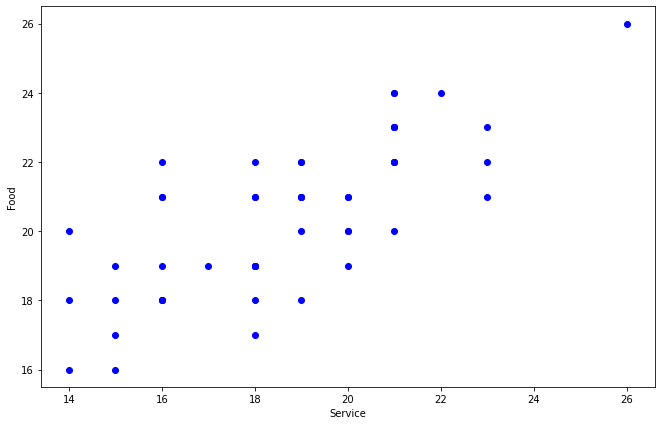

In [17]:
#ploting food vs service
plt.figure(figsize=(11,7))
plt.scatter(df1.service,df1.food,color='b')
plt.xlabel('Service')
plt.ylabel('Food')
plt.show()

There seems to be a relationship , as feature 'food' increases then the feature 'service' also increses. This makes some sense as the food ordered is superior (more value of feature food) then the service provided is also better.

The coefficient  for only simple linear regression with food feature must be different from the food coefficient for multiple regression with three feature as in simple linear regression price value depends only on food feature and in multiple regression the price value depends on all the three feature so MSE loss in both case is different so we can expect differenr coefficient in both regression.

In [18]:
#Simple linear regression only on feature 'food'
reg1 = linear_model.LinearRegression()
reg1.fit(df1[['food']],df1.price)


LinearRegression()

In [19]:
#coefficient of food in simple regression
z=reg1.coef_
print('coeffiecent of food for simple linear regression is '+ str(z[0]))

coeffiecent of food for simple linear regression is 3.340833333333334


Coefficient of food in Simple linear regression is much **different** from the coefficient of food in mutli regression 

This is same as we expected earlier.

**(e) Suppose I asked you to use the multiple regression results to predict the
price of a meal at a restaurant with food = 20, service = 3, and decor =17.
How would you feel about it?**

In [20]:
#finding price value for given value of features
b=reg.predict([[20,17,3]])
print('Predicted value of price is',b[0])

Predicted value of price is 20.739918459357703


It feels good as the predicted value of price is near to the mean value of 50 sample and I expect nearly the same price.so,good.